In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [3]:
import tensorflow as tf
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [4]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [7]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [8]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [9]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [10]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train)

In [11]:
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool, name ):
    # 1X1 Conv
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding="same", activation="relu")(x)

    # 3X3 적용전 1X1 Conv
    reduce_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding="same", activation="relu")(x)
    # 3X3 Conv
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding="same", activation="relu")(reduce_3x3)

    # 5X5 적용전 1X1 Conv
    reduce_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding="same", activation="relu")(x)
    # 5X5 Conv
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding="same", activation="relu")(reduce_5x5)

    # Max Pooling Proj.
    pool = MaxPooling2D((3,3), strides=(1,1), padding="same")(x)
    pool_proj = Conv2D(filters_pool, (1, 1), padding="same", activation="relu")(pool)

    # Concatenate
    # (batch(axis=0), height(axis=1), width(axis=2), depth(axis=3))
    output = Concatenate(axis=-1, name=name)([conv_1x1, conv_3x3, conv_5x5, pool_proj])
    
    return output

In [12]:
IMAGE_SIZE = 150

def build_GoogLeNet():
    tf.keras.backend.clear_session()
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))
    
    x = Conv2D(filters=64, kernel_size=(7, 7), padding="same", strides=(2, 2), activation="relu")(input_tensor)
    x = MaxPooling2D(pool_size=(3, 3), padding="same", strides=(2, 2))(x)
    x = Conv2D(filters=64, kernel_size=(1, 1), padding="same", strides=(1, 1), activation="relu")(x)
    x = Conv2D(filters=192, kernel_size=(3, 3), padding="same", strides=(1, 1), activation="relu")(x)
    x = MaxPooling2D(pool_size=(3, 3), padding="same", strides=(2, 2))(x)
    
    # 인셉션 모듈 3a
    x = inception_module(x, 64, 96, 128, 16, 32, 32, name="inception_3a")
    # 인셉션 모듈 3b
    x = inception_module(x, 128, 128, 192, 32, 96, 64, name="inception_3b")

    x = MaxPooling2D(pool_size=(3, 3), padding="same", strides=(2, 2))(x)

    # 인셉션 모듈 4a
    x = inception_module(x, 192, 96, 208, 16, 48, 64, "inception_4a")
    # 인셉션 모듈 4b
    x = inception_module(x, 160, 112, 224, 24, 64, 64, name="inception_4b")
    # 인셉션 모듈 4c
    x = inception_module(x, 128, 128, 256, 24, 64, 64, name="inception_4c")
    # 인셉션 모듈 4d
    x = inception_module(x, 112, 144, 288, 32, 64, 64, name="inception_4d")
    # 인셉션 모듈 4e
    x = inception_module(x, 256, 160, 320, 32, 128, 128, name="inception_4e")

    x = MaxPooling2D(pool_size=(3, 3), padding="same", strides=(2, 2))(x)

    # 인셉션 모듈 5a
    x = inception_module(x, 256, 160, 320, 32, 128, 128, name="inception_5a")
    # 인셉션 모듈 5b
    x = inception_module(x, 384, 192, 384, 48, 128, 128, name="inception_5b")

    x = GlobalAveragePooling2D()(x) 
    x = Dropout(0.4)(x)    
    output = Dense(units=1, activation='sigmoid')(x)


    model = Model(inputs=input_tensor, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'] )
    return model

model = build_GoogLeNet()
model.summary()

2023-01-13 02:51:05.267994: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 02:51:05.363790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 02:51:05.364580: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 02:51:05.366253: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 75, 75, 64)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 38, 38, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 38, 38, 64)   4160        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 4, verbose=1,factor=0.3, min_lr=0.0000001)

In [14]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 25 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

2023-01-13 02:51:08.705316: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2023-01-13 02:51:12.293930: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


163/163 [==============================] - 23s 79ms/step - loss: 0.5702 - accuracy: 0.7410 - val_loss: 0.7868 - val_accuracy: 0.5000
Epoch 2/25
163/163 [==============================] - 11s 69ms/step - loss: 0.5521 - accuracy: 0.7429 - val_loss: 0.6414 - val_accuracy: 0.5000
Epoch 3/25
163/163 [==============================] - 11s 69ms/step - loss: 0.4045 - accuracy: 0.7707 - val_loss: 0.5612 - val_accuracy: 0.6250
Epoch 4/25
163/163 [==============================] - 12s 72ms/step - loss: 0.3536 - accuracy: 0.8238 - val_loss: 0.6820 - val_accuracy: 0.6875
Epoch 5/25
163/163 [==============================] - 11s 68ms/step - loss: 0.2879 - accuracy: 0.8666 - val_loss: 2.6753 - val_accuracy: 0.5000
Epoch 6/25
163/163 [==============================] - 11s 69ms/step - loss: 0.2771 - accuracy: 0.8777 - val_loss: 0.8864 - val_accuracy: 0.5000
Epoch 7/25
163/163 [==============================] - 12s 73ms/step - loss: 0.2488 - accuracy: 0.8877 - val_loss: 1.6224 - val_accuracy: 0.5000
Epo

In [15]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 1s 16ms/step - loss: 0.3029 - accuracy: 0.8798
Loss of the model is -  0.30293580889701843
20/20 [==============================] - 0s 16ms/step - loss: 0.3029 - accuracy: 0.8798
Accuracy of the model is -  87.9807710647583 %


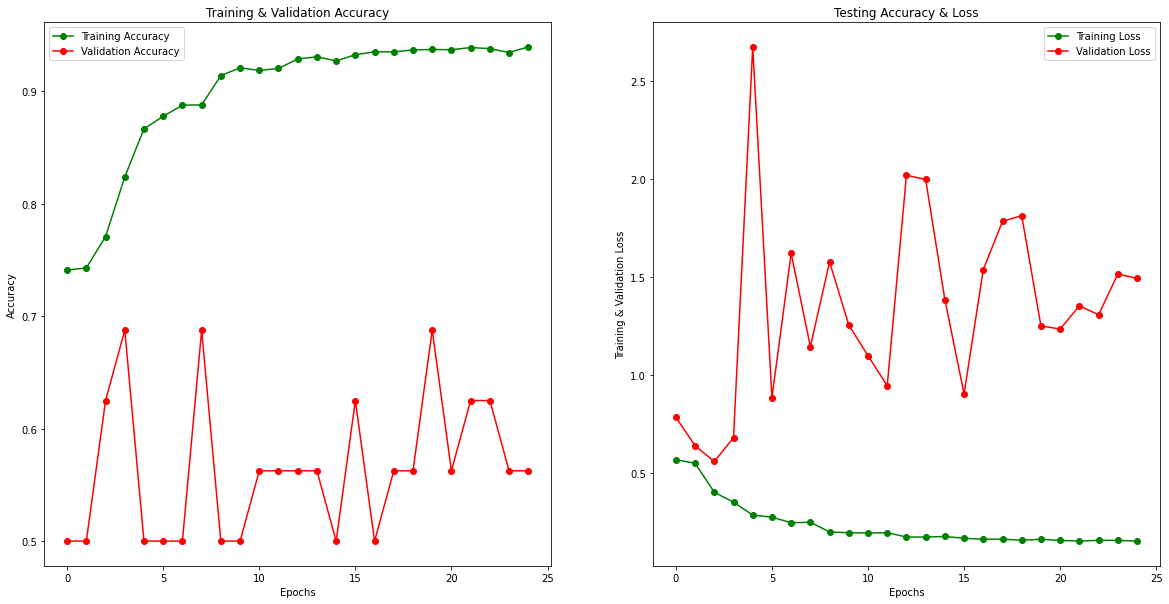

In [16]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()